Example using a filtered back-projection (FBP) in fan beam using `fbp_op`.

Note that the FBP is only approximate in this geometry, but still gives a
decent reconstruction that can be used as an initial guess in more complicated
methods.

In [2]:
import numpy as np
import odl

## Set up geometry of the problem

In [3]:
# Reconstruction space: discretized functions on the cube
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[300, 300],
    dtype='float32')

In [4]:
# Make a circular cone beam geometry with flat detector
# Angles: uniformly spaced, n = 360, min = 0, max = 2 * pi
angle_partition = odl.uniform_partition(0, 2 * np.pi, 360)

In [5]:
# Detector: uniformly sampled, n = 512, min = -60, max = 60
detector_partition = odl.uniform_partition(-60, 60, 512)

In [6]:
# Geometry with large fan angle
geometry = odl.tomo.FanBeamGeometry(
    angle_partition, detector_partition, src_radius=40, det_radius=40)

## Create Filtered Back-projection (FBP) operator

In [7]:
# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

In [8]:
# Create FBP operator using utility function
# We select a Hann filter, and only use the lowest 80% of frequencies to avoid
# high frequency noise.
fbp = odl.tomo.fbp_op(ray_trafo, filter_type='Hann', frequency_scaling=0.8)

## Show some examples

In [9]:
# Create a discrete Shepp-Logan phantom (modified version)
phantom = odl.phantom.shepp_logan(reco_space, modified=True)

In [10]:
# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)

In [11]:
# Calculate filtered back-projection of data
fbp_reconstruction = fbp(proj_data)

In [13]:
proj_data

uniform_discr(
    [  0., -60.], [  6.28318531,  60.        ], (360, 512),
    dtype='float32'
).element(
    [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     ..., 
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.]]
)

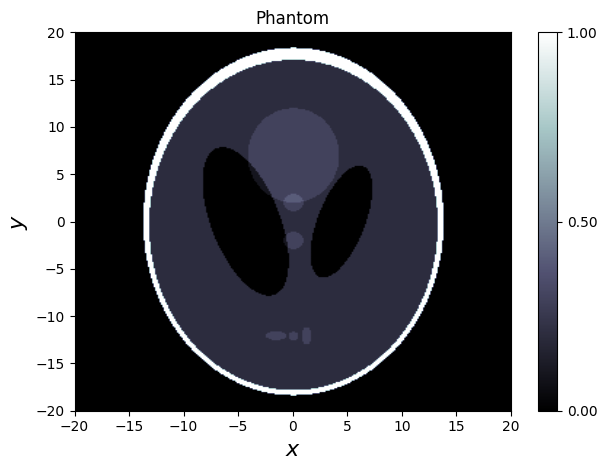

<Figure size 640x480 with 0 Axes>

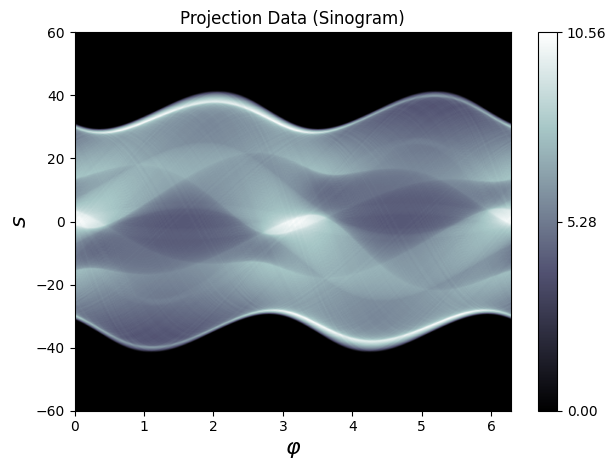

<Figure size 640x480 with 0 Axes>

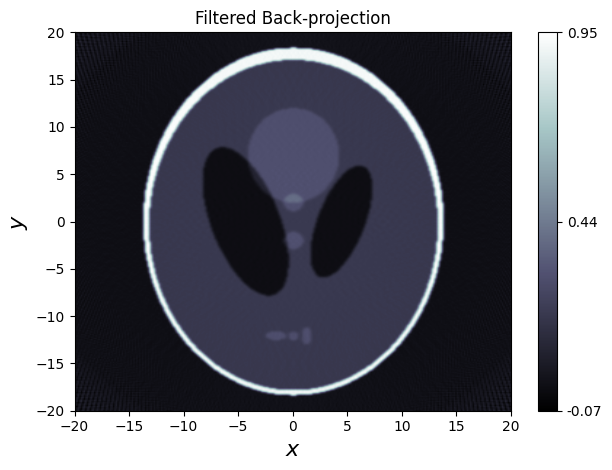

<Figure size 640x480 with 0 Axes>

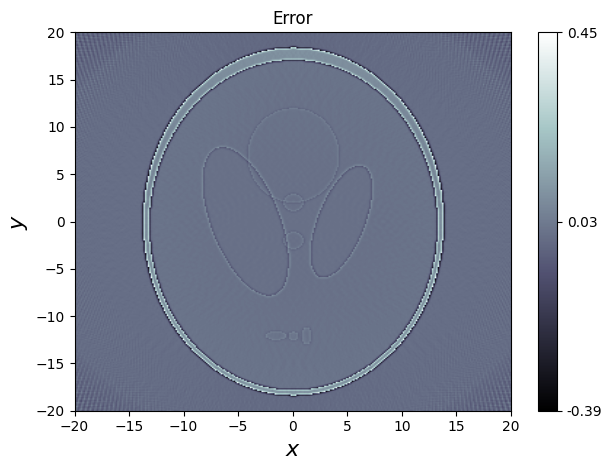

<Figure size 640x480 with 0 Axes>

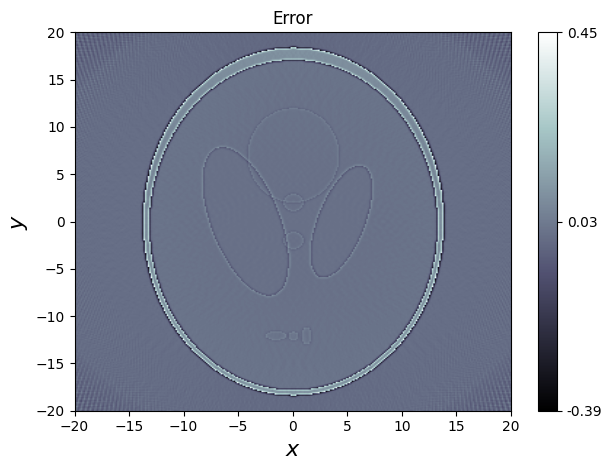

In [11]:
# Shows a slice of the phantom, projections, and reconstruction
phantom.show(title='Phantom')
proj_data.show(title='Projection Data (Sinogram)')
fbp_reconstruction.show(title='Filtered Back-projection')
(phantom - fbp_reconstruction).show(title='Error', force_show=True)